Title: Prediction of Coronary Heart Disease Using Supervised Machine Learning

1. Data Pre-Processing - raw data importation and dataset preparation

In [ ]:
from google.colab import files

In [ ]:
data_file = files.upload()

Saving CHD1.csv to CHD1.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
chds = pd.read_csv('CHD1.csv')

In [ ]:
chds.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,CoronaryDisease
0,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
1,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
2,206,6.00,2.95,32.27,0,72,26.81,56.06,60,1
3,118,0.00,1.88,10.05,0,59,21.57,0.00,17,0
4,132,0.00,1.87,17.21,0,49,23.63,0.97,15,0


In [ ]:
chds.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'CoronaryDisease'],
      dtype='object')

In [ ]:
print(chds.CoronaryDisease.value_counts())

CoronaryDisease
0    302
1    160
Name: count, dtype: int64


2. Data Visualization - visually explore the attributes of the dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

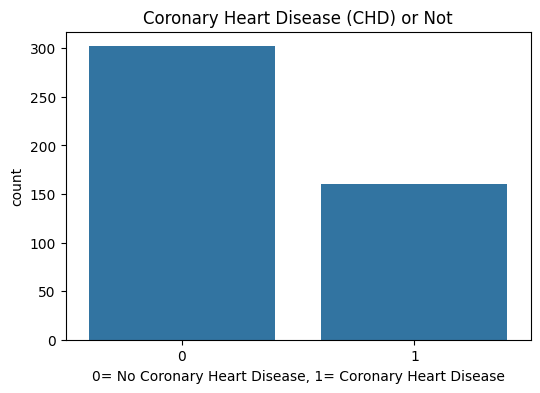

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='CoronaryDisease', data=chds)
_= plt.title('Coronary Heart Disease (CHD) or Not')
_=plt.xlabel('0= No Coronary Heart Disease, 1= Coronary Heart Disease')

In [ ]:
chds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sbp              462 non-null    int64  
 1   tobacco          462 non-null    float64
 2   ldl              462 non-null    float64
 3   adiposity        462 non-null    float64
 4   famhist          462 non-null    int64  
 5   typea            462 non-null    int64  
 6   obesity          462 non-null    float64
 7   alcohol          462 non-null    float64
 8   age              462 non-null    int64  
 9   CoronaryDisease  462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


In [ ]:
chds.shape

(462, 10)

In [ ]:
chds.dtypes

sbp                  int64
tobacco            float64
ldl                float64
adiposity          float64
famhist              int64
typea                int64
obesity            float64
alcohol            float64
age                  int64
CoronaryDisease      int64
dtype: object

3. Perform Descriptive data analysis to summarize the data, visualize and identify outliers, blank/null values

In [ ]:
chds.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,CoronaryDisease
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
chds.describe().T

,count,mean,std,min,25%,50%,75%,max
sbp,462.0,138.326840,20.496317,101.00,124.0000,134.000,148.0000,218.00
tobacco,462.0,3.635649,4.593024,0.00,0.0525,2.000,5.5000,31.20
ldl,462.0,4.740325,2.070909,0.98,3.2825,4.340,5.7900,15.33
adiposity,462.0,25.406732,7.780699,6.74,19.7750,26.115,31.2275,42.49
famhist,462.0,0.415584,0.493357,0.00,0.0000,0.000,1.0000,1.00
typea,462.0,53.103896,9.817534,13.00,47.0000,53.000,60.0000,78.00
obesity,462.0,26.044113,4.213680,14.70,22.9850,25.805,28.4975,46.58
alcohol,462.0,17.044394,24.481059,0.00,0.5100,7.510,23.8925,147.19
age,462.0,42.816017,14.608956,15.00,31.0000,45.000,55.0000,64.00
CoronaryDisease,462.0,0.346320,0.476313,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
chds.isnull().head(20)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,CoronaryDisease
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
chds.isnull().sum()

sbp                0
tobacco            0
ldl                0
adiposity          0
famhist            0
typea              0
obesity            0
alcohol            0
age                0
CoronaryDisease    0
dtype: int64

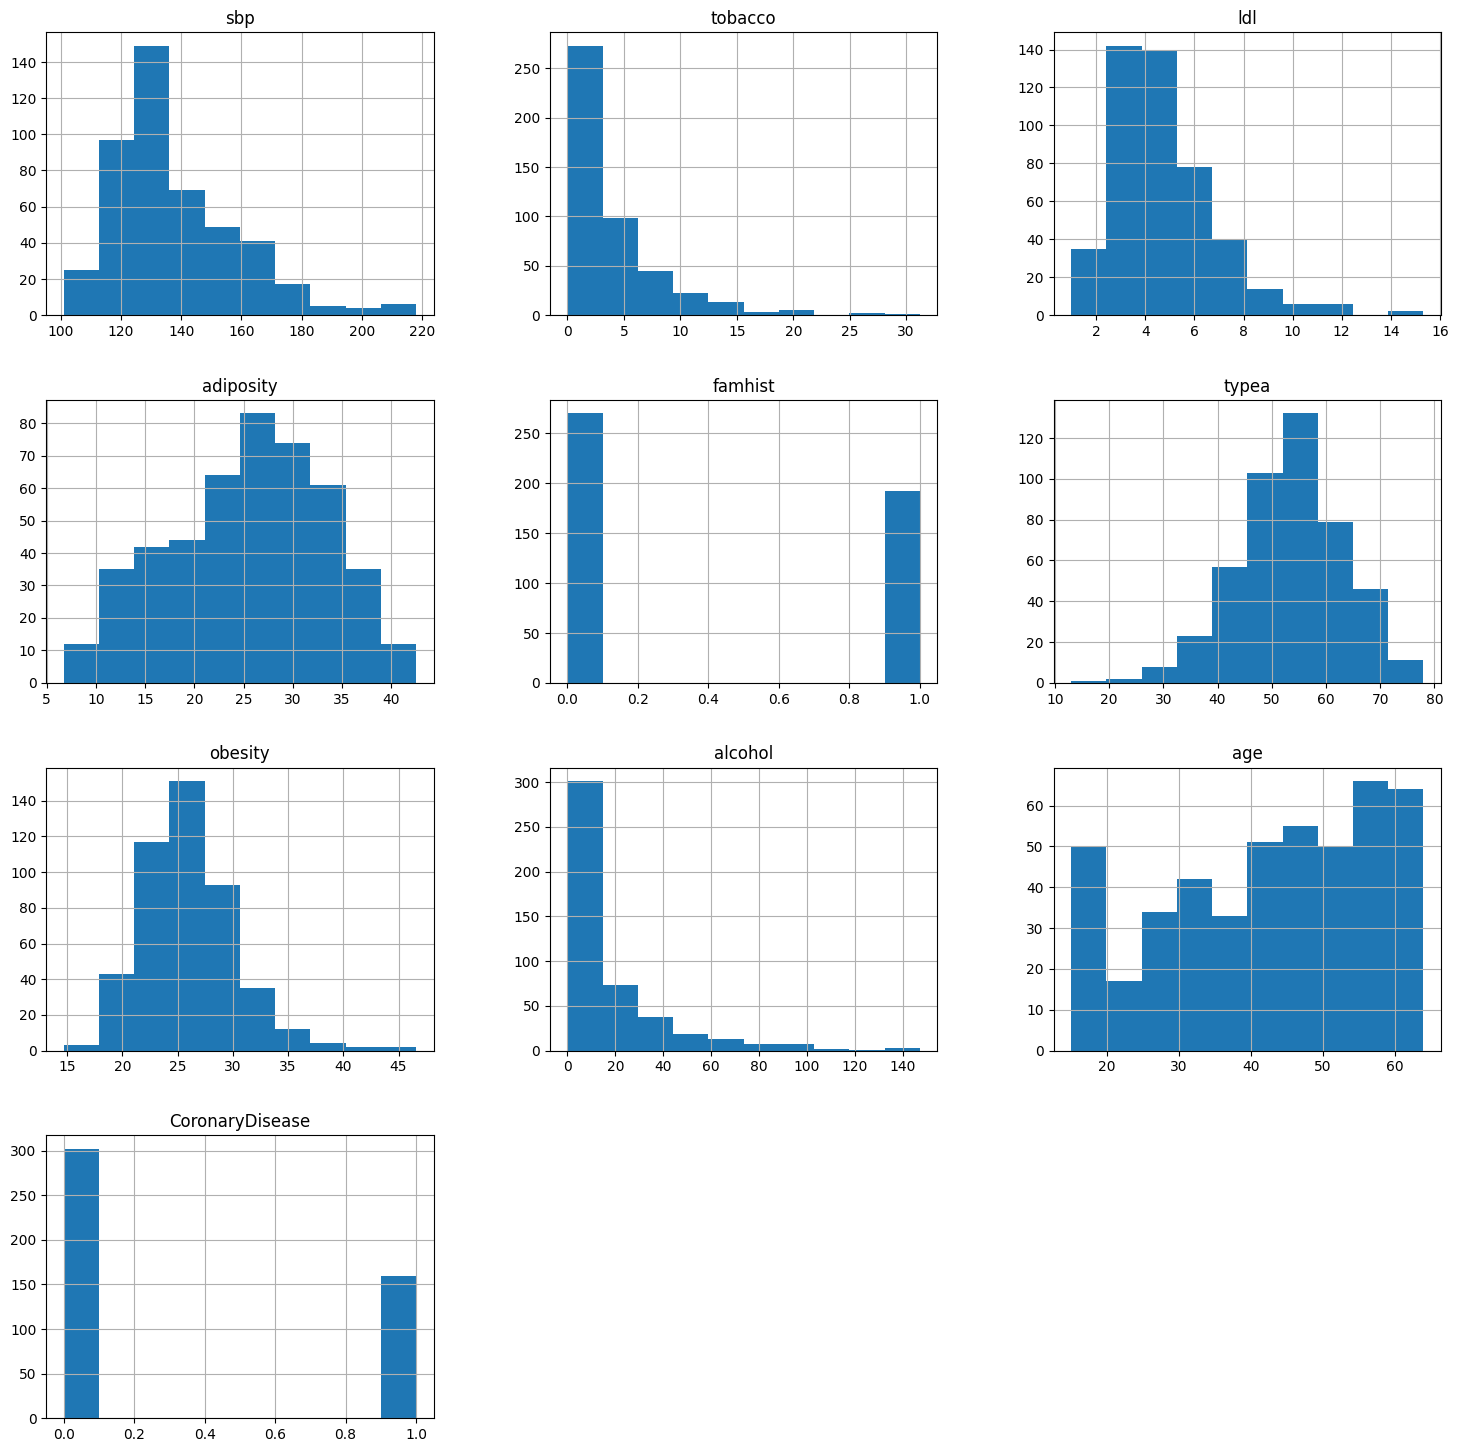

In [ ]:
p = chds.hist(figsize=(18, 18))

4. Compute the correlation coefficients between all the features or variables

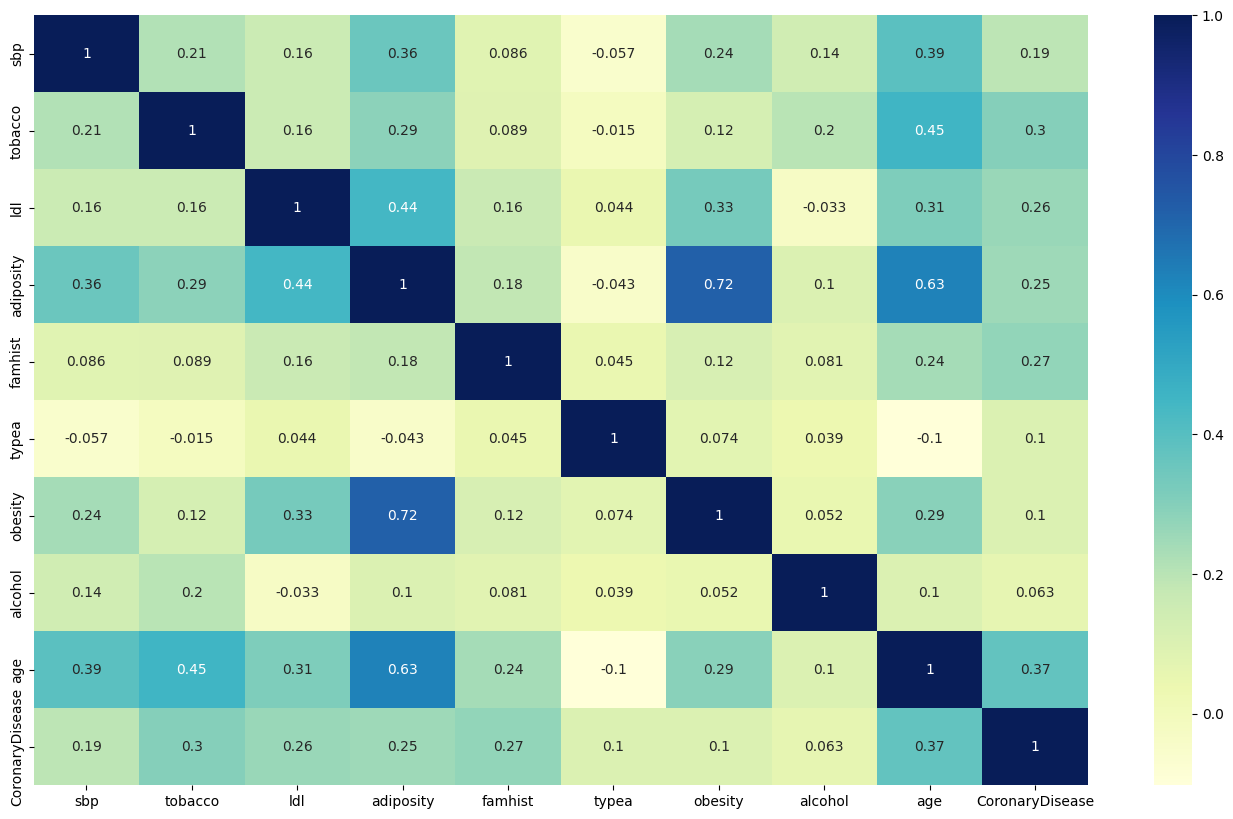

In [ ]:
plt.figure(figsize=(17, 10))
p = sns.heatmap(chds.corr(), annot=True,cmap= 'YlGnBu')

5. Prepare the dataset for model building

In [ ]:
X = chds.drop('CoronaryDisease', axis=1)

In [ ]:
Y = chds['CoronaryDisease']

In [ ]:
from sklearn.model_selection import train_test_split

6. Dataset split into (2) subsets: train (70%) and test (30%). Use the train dataset for training the model and the test dataset for predictions

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=7)

In [ ]:
X_train

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
423,148,8.20,7.75,34.46,1,46,26.53,6.04,64
159,134,12.00,4.96,29.79,0,53,24.86,8.23,57
390,150,14.40,5.04,26.52,1,60,28.84,0.00,45
362,176,5.76,4.89,26.10,1,46,27.30,19.44,57
284,132,7.90,2.85,26.50,1,51,26.16,25.71,44
...,...,...,...,...,...,...,...,...,...
211,136,6.60,6.08,32.74,0,64,33.28,2.72,49
67,154,0.70,5.91,25.00,0,13,20.60,0.00,42
25,134,2.50,3.66,30.90,0,52,27.19,23.66,49
196,156,0.00,3.47,21.10,0,73,28.40,0.00,36


In [ ]:
X_test

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
13,158,1.02,6.33,23.88,0,66,22.13,24.99,46
459,124,1.60,7.22,39.68,1,36,31.50,0.00,51
89,124,15.50,5.05,24.06,0,46,23.22,0.00,61
347,102,0.40,3.41,17.22,1,56,23.59,2.06,39
236,112,4.20,3.58,27.14,0,52,26.83,2.06,40
...,...,...,...,...,...,...,...,...,...
402,162,6.94,4.55,33.36,1,52,27.09,32.06,43
204,124,4.20,2.94,27.59,0,50,30.31,85.06,30
399,132,0.00,6.63,29.58,1,37,29.41,2.57,62
81,116,2.70,3.69,13.52,0,55,21.13,18.51,32


7. Conduct model building using several algorithms: Decision tree, Support Vector Models, Random Forest, K-Nearest Neighbor, Xgboost, and Logistic Regression

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dectree_pred = dectree.predict(X_test)

In [ ]:
print('Accuracy Score =', format(metrics.accuracy_score(Y_test,dectree_pred)))

Accuracy Score = 0.5899280575539568


In [ ]:
from sklearn.svm import SVC

In [ ]:
supportv_model= SVC()
supportv_model.fit(X_train, Y_train)

SVC()

In [ ]:
supportv_pred = supportv_model.predict(X_test)

In [ ]:
print('Accuracy Score =', format(metrics.accuracy_score(Y_test, supportv_pred)))

Accuracy Score = 0.60431654676259


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ranfc= RandomForestClassifier(n_estimators=200)
ranfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
ranfc_train= ranfc.predict(X_train)

In [ ]:
print('Accuracy Score =', format(metrics.accuracy_score(Y_train, ranfc_train)))

Accuracy Score = 1.0


In [ ]:
ranfc_test= ranfc.predict(X_test)

In [ ]:
print('Accuracy Score =', format(metrics.accuracy_score(Y_test, ranfc_test)))

Accuracy Score = 0.6906474820143885


In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
lrsmodel= LogisticRegression()

In [ ]:
lrsmodel.fit(X_train, Y_train)
lrsmodel.score(X_test, Y_test)

0.6906474820143885

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knneigh = KNeighborsClassifier(n_neighbors=3)
knneigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knneigh_pred = knneigh.predict(X_test)

In [ ]:
print('Accuracy Score =', format(metrics.accuracy_score(Y_test, knneigh_pred)))

Accuracy Score = 0.5683453237410072


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgboost_model = XGBClassifier()

In [ ]:
xgboost_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgboost_ypred = xgboost_model.predict(X_test)

In [ ]:
print('Accuracy Score =', format(metrics.accuracy_score(Y_test, xgboost_ypred)))

Accuracy Score = 0.6834532374100719


Text(0.5, 0, 'Feature Importances')

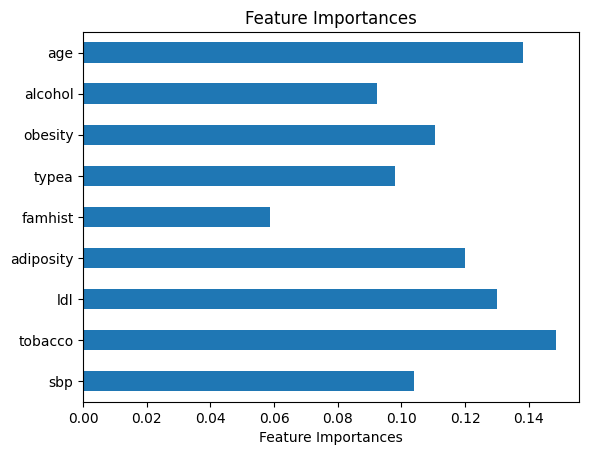

In [ ]:
(pd.Series(ranfc.feature_importances_, index=X.columns).plot(kind='barh'))
plt.title('Feature Importances')
plt.xlabel('Feature Importances')

8. Select the model with the highest accuracy and save it.

In [ ]:
import pickle

In [ ]:
saved_model = pickle.dumps(ranfc)

In [ ]:
ranfc_from_pickle = pickle.loads(saved_model)

In [ ]:
ranfc_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1])

In [ ]:
X_test

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
13,158,1.02,6.33,23.88,0,66,22.13,24.99,46
459,124,1.60,7.22,39.68,1,36,31.50,0.00,51
89,124,15.50,5.05,24.06,0,46,23.22,0.00,61
347,102,0.40,3.41,17.22,1,56,23.59,2.06,39
236,112,4.20,3.58,27.14,0,52,26.83,2.06,40
...,...,...,...,...,...,...,...,...,...
402,162,6.94,4.55,33.36,1,52,27.09,32.06,43
204,124,4.20,2.94,27.59,0,50,30.31,85.06,30
399,132,0.00,6.63,29.58,1,37,29.41,2.57,62
81,116,2.70,3.69,13.52,0,55,21.13,18.51,32


In [ ]:
ranfc.predict([[162, 6.94, 4.55, 33.36, 1, 52, 27.09, 32.06, 43]]) # for patient 402

array([0])

In [ ]:
ranfc.predict([[116, 2.70, 3.69, 13.52, 0, 55, 21.13, 18.51, 32]]) # for patient 81

array([0])

In [ ]:
ranfc.predict([[132, 0.00, 6.63, 29.58, 1, 37, 29.41, 2.57, 62]]) #for patient 399

array([0])

Main Assignment: Check New Patient Data to see the predicted Coronary Heart Disease (CHD) Status for that patient

In [ ]:
ranfc.predict([[200, 13, 4, 28.61, 1, 12, 19, 2.06, 63]]) #patient 1

array([1])

In [ ]:
ranfc.predict([[145, 11, 5, 16.2, 0, 79, 30, 2.62, 38]]) #patient 2

array([1])

In [ ]:
ranfc.predict([[200, 25, 2, 32.27, 0, 80, 1, 56.06, 60]]) #patient 3

array([1])

In [ ]:
ranfc.predict([[118, 3, 2, 10.05, 1, 20, 10, 0, 17]]) #patient 4

array([0])